In [0]:
from google.colab import drive
import pandas as pd
drive.mount('/content/var')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/var


# Reading the libraries

In [0]:
#@title Default title text
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from datetime import date
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import tensorflow as tf
from tensorflow.python.framework import ops

In [0]:
train=pd.read_excel('var/My Drive/Data_Train.xlsx')
#test=pd.read_excel('/var/Test_set.xlsx')

In [0]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [0]:
train['Source']=LabelEncoder().fit_transform(train['Source'].astype('str'))
train['Destination']=LabelEncoder().fit_transform(train['Destination'].astype('str'))
train['Airline']=LabelEncoder().fit_transform(train['Airline'].astype('str'))
train['Total_Stops']=LabelEncoder().fit_transform(train['Total_Stops'].astype('str'))

In [0]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,5,No info,3897
1,1,6,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,No info,7662
2,4,43,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,No info,13882
3,3,10,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,No info,6218
4,3,0,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,No info,13302


In [0]:
train['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [0]:
train=train.drop(['Additional_Info'],axis=1)

In [0]:
train['Total_Stops'].unique()

array([5, 1, 0, 2, 4, 3])

In [0]:
train=train.dropna()

In [0]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [0]:
train.dtypes

Airline             int64
Date_of_Journey    object
Source              int64
Destination         int64
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int64
Price               int64
dtype: object

In [0]:
train['Dep_Time']=train.apply(lambda x : [int(i.split(':')[0]) for i in train['Dep_Time']])

In [0]:
train['Arrival_Time']=train.apply(lambda x : [int(i.split(':')[0]) for i in train['Arrival_Time']])

In [0]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,3,24/03/2019,0,5,BLR → DEL,22,1,2h 50m,5,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,5,13,7h 25m,1,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,9,4,19h,1,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18,23,5h 25m,0,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16,21,4h 45m,0,13302


In [0]:
train['Arrival_Time']=pd.cut(train['Arrival_Time'],bins=[0,5,10,15,20,25])


In [0]:
train['Dep_Time']=pd.cut(train['Dep_Time'],bins=[0,5,10,15,20,25])

In [0]:
train['Dep_Time']=LabelEncoder().fit_transform(train['Dep_Time'].astype('str'))

In [0]:
train['Arrival_Time']=LabelEncoder().fit_transform(train['Arrival_Time'].astype('str'))

In [0]:
train['Duration']=train.apply(lambda x: [int(i[0]) for i in train['Duration']])

In [0]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,3,24/03/2019,0,5,BLR → DEL,3,0,2,5,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,0,1,7,1,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,4,0,1,1,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,2,3,5,0,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,2,3,4,0,13302


In [0]:
train['Route']=train.apply(lambda x:[int(len((i.split(chr(8594))))) for i in train['Route']])

In [0]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,3,24/03/2019,0,5,2,15,1,2,5,3897
1,1,1/05/2019,3,0,4,19,5,7,1,7662
2,4,9/06/2019,2,1,4,23,18,1,1,13882
3,3,12/05/2019,3,0,3,10,16,5,0,6218
4,3,01/03/2019,0,5,3,8,14,4,0,13302


In [0]:
train.dtypes


Airline             int64
Date_of_Journey    object
Source              int64
Destination         int64
Route               int64
Dep_Time            int64
Arrival_Time        int64
Duration            int64
Total_Stops         int64
Price               int64
dtype: object

In [0]:
train.dtypes

Airline            int64
Date_of_Journey    int64
Source             int64
Destination        int64
Route              int64
Dep_Time           int64
Arrival_Time       int64
Duration           int64
Total_Stops        int64
Price              int64
dtype: object

In [0]:
x=[]
for i in train['Date_of_Journey']:
  day, month, year=(int(i.split('/')[0]),int(i.split('/')[1]),int(i.split('/')[2]))
  x.append(datetime.date(year, month, day).strftime("%A"))
  

In [0]:
train['Date_of_Journey']=x

In [0]:
train['Date_of_Journey']=LabelEncoder().fit_transform(train['Date_of_Journey'].astype('str'))

In [0]:
train.dtypes

Airline            int64
Date_of_Journey    int64
Source             int64
Destination        int64
Route              int64
Dep_Time           int64
Arrival_Time       int64
Duration           int64
Total_Stops        int64
Price              int64
dtype: object

In [0]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,3,3,0,5,2,15,1,2,5,3897
1,1,6,3,0,4,19,5,7,1,7662
2,4,3,2,1,4,23,18,1,1,13882
3,3,3,3,0,3,10,16,5,0,6218
4,3,0,0,5,3,8,14,4,0,13302


In [0]:
X=train.iloc[0:,0:9]
y=train.iloc[0:,9:]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24 ,random_state=1)

In [0]:
model=LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
y_pred=model.predict(X_test)

In [0]:
r2_score(y_test,y_pred)

0.35066429595644866

In [0]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
...                              random_state=0)

In [0]:
model=clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
y_pred=model.predict(X_test)

In [0]:
metrics.accuracy_score(y_test,y_pred)

0.0893985490287854

Text(0, 0.5, 'test')

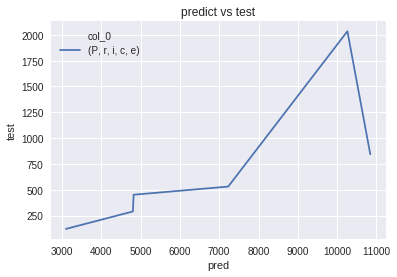

In [0]:
%matplotlib inline
pd.crosstab(y_pred,y_test).plot(kind='line')
plt.title('predict vs test')
plt.xlabel('pred')
plt.ylabel('test')

Text(0.5, 0, 'Relative Importance')

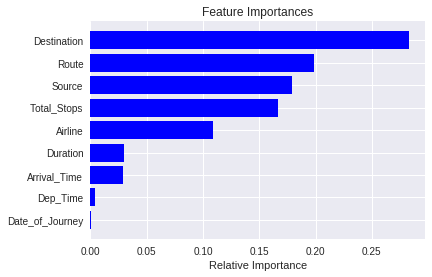

In [0]:
features=train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [0]:
input_size

9

In [0]:
X_train.shape

(6409, 9)

In [0]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape=[n_x, None])
    Y = tf.placeholder(tf.float32, shape=[n_y, None])
    return X, Y

def initialize_parameters():
    # when I increase this to 2 times of input, the cost decrease rapidly
    # when I increase this to 1000, boom! train acc get to 97%, but test acc is below 60%
    output_size = 1
    l1_size = 18 #int(input_size * 2) 
    l2_size = 9 #int(input_size * 1)
    l3_size = output_size#int(input_size * 1)
    l4_size = output_size
    
    W1 = tf.get_variable("W1", [l1_size, input_size],
                         initializer=tf.contrib.layers.xavier_initializer()) # seed=1
    b1 = tf.get_variable("b1", [l1_size, 1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [l2_size, l1_size], 
                         initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [l2_size, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [l3_size, l2_size], 
                         initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [l3_size, 1], initializer=tf.zeros_initializer())
    W4 = tf.get_variable("W4", [l4_size, l3_size], 
                         initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.get_variable("b4", [l4_size, 1], initializer=tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4
                 }

    return parameters

In [0]:
def forward_propagation(X, parameters):
    """
    LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
    Z3 -- the output of the last LINEAR unit
    """
    # Retrieve the parameters from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']

    keep_prob = 0.7 #0.3  # if dropout too many, the predict result will be always 0
    Z1 = tf.add(tf.matmul(W1, X), b1)  # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.dropout(tf.nn.relu(Z1), keep_prob=keep_prob)  # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)  # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.dropout(tf.nn.relu(Z2), keep_prob=keep_prob)  # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)  # Z3 = np.dot(W3,Z2) + b3
    A3 = tf.nn.dropout(tf.nn.relu(Z3), keep_prob=keep_prob)  
    Z4 = tf.add(tf.matmul(W4, A3), b4)  

    return Z3

def forward_propagation_for_predict(X, parameters):
    """
    Returns: Z3 -- the output of the last LINEAR unit
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)  # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)  # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)  # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)  # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)  # Z3 = np.dot(W3,Z2) + b3
    A3 = tf.nn.relu(Z3)  # A2 = relu(Z2)
    Z4 = tf.add(tf.matmul(W4, A3), b4)  # Z3 = np.dot(W3,Z2) + b3

    return Z3

In [0]:
def compute_cost(Z3, Y):
    """
    Z3 -- output of forward propagation (output of the last LINEAR unit)
    Y -- "true" labels vector placeholder, same shape as Z3
    Return: cost - Tensor of the cost function
    """
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))
    return cost

In [0]:
def model(X_train, Y_train, X_val, Y_val, learning_rate=0.0001,
          num_epochs=1500, print_cost=True):
    """
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    ops.reset_default_graph()  # to be able to rerun the model without overwriting tf variables
    (n_x, m) = X_train.shape  # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]  # n_y : output size
    costs, val_losses = [], []  # To keep track of the cost

    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()

    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)

    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    val_cost = compute_cost(forward_propagation_for_predict(X, parameters), Y)

    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    # Initialize all the variables
    init = tf.global_variables_initializer()
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        sess.run(init)

        # Do the training loop
        for epoch in range(num_epochs):
            _, epoch_cost = sess.run([optimizer, cost],
                                     feed_dict={X: X_train, Y: Y_train})

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                epoch_val_loss = sess.run(val_cost, feed_dict={X: X_val, Y: Y_val})
                if epoch % 100 == 0:
                    print ("Loss after epoch %i: training[%f] | dev[%f]" % (epoch, epoch_cost, epoch_val_loss))
                val_losses.append(epoch_val_loss)
                costs.append(epoch_cost)

        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.plot(np.squeeze(val_losses))
        plt.legend(["training", "test"])
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        y_hat = tf.cast(tf.greater(tf.sigmoid(Z3),0.5), tf.float32)
        correct_prediction = tf.equal(y_hat, Y)

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy: ", "{:3.2f}%".format(100*accuracy.eval({X: X_train, Y: Y_train})))
        print ("Test Accuracy:", "{:3.2f}%".format(100*accuracy.eval({X: X_val, Y: Y_val})))

        return parameters

In [0]:
input_size = len(train.columns) - 1

In [0]:
X_train = X_train.reshape((X_train.shape[1], X_train.shape[0]))
X_val = X_val.reshape((X_val.shape[1], X_val.shape[0]))

Y_train = Y_train.reshape((1, Y_train.shape[0]))
Y_val = Y_val.reshape((1, Y_val.shape[0]))


NameError: ignored

In [0]:
parameters = model(X_train, y_train, X_test, y_test,learning_rate=0.001, num_epochs=2000)

ValueError: ignored

In [0]:
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [0]:
X_train.shape

(8118, 9)

In [0]:
model = Sequential()
model.add(Dense(input_dim=X.shape[1], units=128,
                 kernel_initializer='normal', bias_initializer='zeros'))
model.add(Activation('relu'))

for i in range(0, 8):
    model.add(Dense(units=128, kernel_initializer='normal',
                     bias_initializer='zeros'))
    model.add(Activation('relu'))
    #model.add(Dropout(.40))

model.add(Dense(units=1))
model.add(Activation('softmax'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=600, verbose=2)

Epoch 1/600
 - 3s - loss: 103838058.3198 - acc: 0.0000e+00
Epoch 2/600
 - 1s - loss: 103838058.3080 - acc: 0.0000e+00
Epoch 3/600
 - 1s - loss: 103838058.5169 - acc: 0.0000e+00
Epoch 4/600
 - 1s - loss: 103838058.5602 - acc: 0.0000e+00
Epoch 5/600
 - 1s - loss: 103838058.9249 - acc: 0.0000e+00
Epoch 6/600
 - 1s - loss: 103838058.9465 - acc: 0.0000e+00
Epoch 7/600
 - 1s - loss: 103838059.1831 - acc: 0.0000e+00
Epoch 8/600
 - 1s - loss: 103838058.7396 - acc: 0.0000e+00
Epoch 9/600
 - 1s - loss: 103838058.9170 - acc: 0.0000e+00
Epoch 10/600
 - 1s - loss: 103838059.3269 - acc: 0.0000e+00
Epoch 11/600
 - 1s - loss: 103838058.5031 - acc: 0.0000e+00
Epoch 12/600
 - 1s - loss: 103838058.6529 - acc: 0.0000e+00
Epoch 13/600
 - 1s - loss: 103838058.7337 - acc: 0.0000e+00
Epoch 14/600
 - 1s - loss: 103838059.3348 - acc: 0.0000e+00
Epoch 15/600
 - 1s - loss: 103838058.6135 - acc: 0.0000e+00
Epoch 16/600
 - 1s - loss: 103838058.9899 - acc: 0.0000e+00
Epoch 17/600
 - 1s - loss: 103838059.0037 - acc: 

In [0]:
pred=tmodel.predict(X_test)